# Model Training and Simple Evaluation

In this notebook I will train 2 models and evaluate them. The first model is Shallow Net, which consists of a single convolutional layer. The second model, NovelCNN, is a more deeper model, which consists of 4 convolutional layers, with maxpooling and batch normalization between them and 2 fully connected layers with dropout. Both models make use of the relu activation function in each of their layers, and an additional classification layer at then end with softmax activation.


The code used in this notebook has been adapted from the provided cnn_classifier.py file (included in the repository).

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from ImageToArrayPreprocessor import ImageToArrayPreprocessor
from SimplePreprocessor import SimplePreprocessor
from DataLoader import DataLoader
from ShallowNet import ShallowNet
from NovelCNN import NovelCNN
from tensorflow.keras.optimizers import Adam, SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import json

## Load the Data

Grab the list of images that we’ll be describing

In [2]:
imagePaths = list(paths.list_images("../Part 1/image_dataset/corpus/"))

Now partition the data into training and testing splits using 80% for training and 20% for testing.
After that is done, further partition the training data into training and validation sets using 80% of the training data for training and the remaining 20% for validation.

Finally a paths dictionary is created to store a list of paths to each subset. This is then saved as a json file, as per requirements of the project.

In [3]:
train_paths, test_paths = train_test_split(imagePaths, test_size=0.2, random_state=42)
train_paths, val_paths = train_test_split(train_paths, test_size=0.2, random_state=42)

paths_dict = { "train": train_paths, "val": val_paths, "test": test_paths }

with open("paths.json", "w") as f:
    f.write(json.dumps(paths_dict))

### Pre-Processing

The SimplePreprocessor class will be used to resize the images (480x480) to a fixed size of (32x32). 

The ImageToArrayPreprocessor class will be used to convert the images to numpy arrays and normalize the pixel values to the range [0, 1].

Next the DataLoader class is used read the images and labels from the paths list.

Lastly, the data labels are converted to categorical labels using the LabelBinarizer class.


In [4]:
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor(dataFormat="channels_last")

sdl = DataLoader(preprocessors=[sp, iap])

print("[INFO] loading training set...")
trainX, trainY = sdl.load(train_paths, verbose=100)
print("[INFO] loading validation set...")   
valX, valY = sdl.load(val_paths, verbose=100)
print("[INFO] loading testing set...")
testX, testY = sdl.load(test_paths, verbose=100)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)
testY = lb.transform(testY)


[INFO] loading training set...
[INFO] processed 100/2355
[INFO] processed 200/2355
[INFO] processed 300/2355
[INFO] processed 400/2355
[INFO] processed 500/2355
[INFO] processed 600/2355
[INFO] processed 700/2355
[INFO] processed 800/2355
[INFO] processed 900/2355
[INFO] processed 1000/2355
[INFO] processed 1100/2355
[INFO] processed 1200/2355
[INFO] processed 1300/2355
[INFO] processed 1400/2355
[INFO] processed 1500/2355
[INFO] processed 1600/2355
[INFO] processed 1700/2355
[INFO] processed 1800/2355
[INFO] processed 1900/2355
[INFO] processed 2000/2355
[INFO] processed 2100/2355
[INFO] processed 2200/2355
[INFO] processed 2300/2355
[INFO] loading validation set...
[INFO] processed 100/589
[INFO] processed 200/589
[INFO] processed 300/589
[INFO] processed 400/589
[INFO] processed 500/589
[INFO] loading testing set...
[INFO] processed 100/737
[INFO] processed 200/737
[INFO] processed 300/737
[INFO] processed 400/737
[INFO] processed 500/737
[INFO] processed 600/737
[INFO] processed 70

## Model Compilation

Now that the data has been loaded and pre-processed, we can start compiling the models. 

### Shallow Net
For shallow net, I kept the setup that came with the cnn_classifier.py file. However, I quickly realized that by using Adam instead of SGD, and learning for 100 epochs, the model actually performs better. Hence, I also compile an U(pgraded) Shallow Net model: u_shallow model.

In [5]:
opt = SGD(learning_rate=0.005)
shallow = ShallowNet.build(width=32, height=32, depth=3, classes=len(lb.classes_))
shallow.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

2021-12-04 13:29:22.499821: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-04 13:29:22.788893: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-04 13:29:22.788931: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 980 Ti computeCapability: 5.2
coreClock: 1.152GHz coreCount: 22 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 313.37GiB/s
2021-12-04 13:29:22.792317: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-12-04 13:29:22.859301: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-12-04 13:29:22.897597: I tensorflow/stream_execu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                655380    
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
Total params: 656,276
Trainable params: 656,276
Non-trainable params: 0
_________________________________________________________________


### U Shallow Net

In [6]:
opt = Adam()
u_shallow = ShallowNet.build(width=32, height=32, depth=3, classes=len(lb.classes_))
u_shallow.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                655380    
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
Total params: 656,276
Trainable params: 656,276
Non-trainable params: 0
_________________________________________________________________


### Novel CNN

Here I compile the NovelCNN model. Like U Shallow, I used Adam, because it performs better. The report goes over the implementation details of the actual model and the design decisions made.

In [7]:
opt = Adam()
novel = NovelCNN.build(width=32, height=32, depth=3, classes=len(lb.classes_))
novel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)        

## Model Training

Now I train the models. Keras makes it simple by using the fit function. It returns a history object, which contains the loss and accuracy values for each epoch. This will then be plotted later on for evaluating how well the model trained.


##### NOTE: THIS SECTION PRODUCES ALOT OF OUTPUT. IF YOU WANT TO IGNORE IT, ADD '%%capture' AT THE BEGINNING OF THE CELL. FOR THIS REASON, I HAVE REMOVED THE CLUTTER IN THE HTML FILE. 


### Shallow Net

In [8]:
s_n_epochs = 500
shallow_H = shallow.fit(trainX, trainY, validation_data=(valX, valY), batch_size=512, epochs=s_n_epochs, verbose=1)

Epoch 1/500


2021-12-04 13:29:26.734354: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-12-04 13:29:27.278819: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


5/5 [==============================] - 0s 51ms/step - loss: 3.0011 - accuracy: 0.0628 - val_loss: 2.9925 - val_accuracy: 0.0475
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 2.9874 - accuracy: 0.0688 - val_loss: 2.9912 - val_accuracy: 0.0594
Epoch 3/500
5/5 [==============================] - 0s 18ms/step - loss: 2.9831 - accuracy: 0.0730 - val_loss: 2.9900 - val_accuracy: 0.0611
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 2.9792 - accuracy: 0.0756 - val_loss: 2.9906 - val_accuracy: 0.0628
Epoch 5/500
5/5 [==============================] - 0s 18ms/step - loss: 2.9770 - accuracy: 0.0743 - val_loss: 2.9891 - val_accuracy: 0.0594
Epoch 6/500
5/5 [==============================] - 0s 18ms/step - loss: 2.9749 - accuracy: 0.0764 - val_loss: 2.9881 - val_accuracy: 0.0594
Epoch 7/500
5/5 [==============================] - 0s 18ms/step - loss: 2.9725 - accuracy: 0.0735 - val_loss: 2.9873 - val_accuracy: 0.0594
Epoch 8/500
5/5 [===============

### U Shallow Net

In [9]:
us_n_epochs = 100
ushallow_H = u_shallow.fit(trainX, trainY, validation_data=(valX, valY), batch_size=512, epochs=us_n_epochs, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 28ms/step - loss: 3.5637 - accuracy: 0.0590 - val_loss: 3.3610 - val_accuracy: 0.0509
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 3.1727 - accuracy: 0.1083 - val_loss: 3.0527 - val_accuracy: 0.1138
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 2.8777 - accuracy: 0.1206 - val_loss: 2.8626 - val_accuracy: 0.1256
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 2.7743 - accuracy: 0.1473 - val_loss: 2.7762 - val_accuracy: 0.1528
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 2.6550 - accuracy: 0.2297 - val_loss: 2.7021 - val_accuracy: 0.2377
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 2.5178 - accuracy: 0.3053 - val_loss: 2.6127 - val_accuracy: 0.2649
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 2.3492 - accuracy: 0.3902 - val_loss: 2.4816 - val_accuracy: 0.2852
Epoch 8/100
5/5 [===

### Novel CNN

In [10]:
n_n_epochs = 2000
novel_H = novel.fit(trainX, trainY, validation_data=(valX, valY), batch_size=512, epochs=n_n_epochs, verbose=1)

Epoch 1/2000
5/5 [==============================] - 1s 232ms/step - loss: 8.2095 - accuracy: 0.0688 - val_loss: 3.0018 - val_accuracy: 0.0713
Epoch 2/2000
5/5 [==============================] - 0s 63ms/step - loss: 2.9864 - accuracy: 0.0947 - val_loss: 3.0417 - val_accuracy: 0.0272
Epoch 3/2000
5/5 [==============================] - 0s 80ms/step - loss: 2.8704 - accuracy: 0.1520 - val_loss: 3.0780 - val_accuracy: 0.0475
Epoch 4/2000
5/5 [==============================] - 0s 63ms/step - loss: 2.6697 - accuracy: 0.1911 - val_loss: 3.1088 - val_accuracy: 0.0611
Epoch 5/2000
5/5 [==============================] - 0s 62ms/step - loss: 2.3450 - accuracy: 0.2671 - val_loss: 3.1485 - val_accuracy: 0.0594
Epoch 6/2000
5/5 [==============================] - 0s 62ms/step - loss: 1.9786 - accuracy: 0.3554 - val_loss: 3.2501 - val_accuracy: 0.0374
Epoch 7/2000
5/5 [==============================] - 0s 63ms/step - loss: 1.6524 - accuracy: 0.4416 - val_loss: 3.3840 - val_accuracy: 0.0323
Epoch 8/2000

## Model Testing

The models are now trained. Now I evaluate them using the classification_report function. Note the print() function needs to be used, otherwise the output will not be clean.
(As opposed to making the statement the last in a cell, which usually outputs the result of the last statement.)

### Shallow Net

In [11]:
shallow_predictions = shallow.predict(testX, batch_size=8)
print(classification_report(testY.argmax(axis=1), shallow_predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      ajh001       0.69      0.59      0.64        59
      alw001       0.68      0.71      0.70        45
      apd001       0.81      0.40      0.53        43
      ars001       0.62      0.67      0.64        27
      axm001       0.55      0.63      0.59        38
      cxb001       0.67      0.38      0.49        26
      ikp001       0.73      0.76      0.75        29
      ixj001       0.60      0.32      0.42        28
      jah001       0.62      0.38      0.47        34
      jep001       0.74      0.65      0.69        31
      jxs001       0.50      0.45      0.48        42
      knb001       0.55      0.94      0.70        52
      lcg001       0.53      0.68      0.59        28
      lst001       0.36      0.35      0.36        34
      mam001       0.58      0.51      0.55        35
      mjd001       0.83      0.76      0.79        33
      mpt001       0.55      0.88      0.68        41
      mrs001       0.64    

### U Shallow Net

In [12]:
u_shallow_predictions = u_shallow.predict(testX, batch_size=8)
print(classification_report(testY.argmax(axis=1), u_shallow_predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      ajh001       0.84      0.71      0.77        59
      alw001       0.76      0.64      0.70        45
      apd001       0.79      0.77      0.78        43
      ars001       0.66      0.85      0.74        27
      axm001       0.74      0.68      0.71        38
      cxb001       0.74      0.77      0.75        26
      ikp001       0.72      0.72      0.72        29
      ixj001       0.68      0.61      0.64        28
      jah001       0.67      0.59      0.62        34
      jep001       0.76      0.71      0.73        31
      jxs001       0.51      0.64      0.57        42
      knb001       0.84      0.88      0.86        52
      lcg001       0.62      0.71      0.67        28
      lst001       0.51      0.59      0.55        34
      mam001       0.72      0.60      0.66        35
      mjd001       0.81      0.88      0.84        33
      mpt001       0.86      0.90      0.88        41
      mrs001       0.78    

### Novel CNN

In [13]:
novel_predictions = novel.predict(testX, batch_size=8)
print(classification_report(testY.argmax(axis=1), novel_predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      ajh001       0.93      0.92      0.92        59
      alw001       0.93      0.87      0.90        45
      apd001       0.91      0.95      0.93        43
      ars001       0.93      0.96      0.95        27
      axm001       0.84      0.95      0.89        38
      cxb001       0.91      0.77      0.83        26
      ikp001       0.85      0.97      0.90        29
      ixj001       0.87      0.93      0.90        28
      jah001       1.00      0.82      0.90        34
      jep001       0.85      0.90      0.88        31
      jxs001       0.97      0.86      0.91        42
      knb001       0.89      0.94      0.92        52
      lcg001       0.85      1.00      0.92        28
      lst001       0.97      0.91      0.94        34
      mam001       0.94      0.91      0.93        35
      mjd001       0.91      0.88      0.89        33
      mpt001       1.00      1.00      1.00        41
      mrs001       0.89    

## Model Training Evaluation

The classification report printed gives a good summary of the model perfomance on the test data. Using the loss_and_accuracy function, I can plot the loss and accuracy values for each epoch for both training and validation. This gives me a better idea of how well the model trained, and was utilised during the development of the novel model to see if the effect of changes on the model.

In [14]:
def loss_and_accuracy(H, n_epochs, title):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,n_epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0,n_epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0,n_epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0,n_epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig(f"{title}_loss_and_accuracy.png")
    plt.show()

### Shallow Net

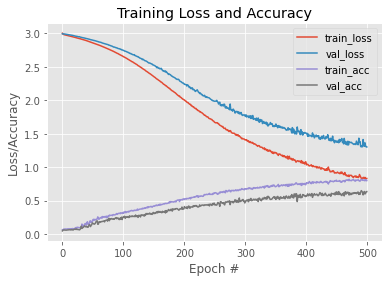

In [15]:
loss_and_accuracy(shallow_H, s_n_epochs, "shallow")

### U Shallow Net

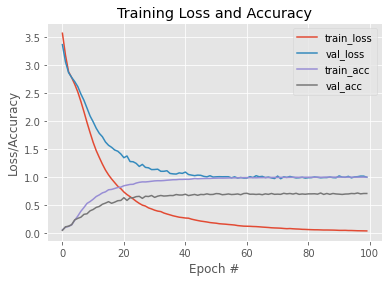

In [16]:
loss_and_accuracy(ushallow_H, us_n_epochs, "upgraded_shallow")

### Novel CNN

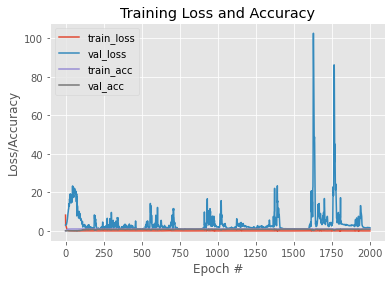

In [17]:
loss_and_accuracy(novel_H, n_n_epochs, "novel")